In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from TrinomialModel import TrinomialOption as TO
from BinomialModel import BinomialOption as BO

          Date        Open        High         Low       Close   Adj Close  \
0   2021-06-24  152.669998  153.626999  149.860001  150.729996  150.729996   
1   2021-06-25  151.229996  153.169998  149.279999  149.669998  149.669998   
2   2021-06-28  148.615005  150.929993  147.080002  149.940002  149.940002   
3   2021-06-29  149.750000  149.940002  145.770004  146.080002  146.080002   
4   2021-06-30  145.544998  154.089996  144.244995  153.139999  153.139999   
..         ...         ...         ...         ...         ...         ...   
248 2022-06-17   93.529999  100.610001   93.529999   99.489998   99.489998   
249 2022-06-21  102.690002  104.889000  101.620003  102.269997  102.269997   
250 2022-06-22   99.000000  102.500000   98.720001   99.529999   99.529999   
251 2022-06-23  100.000000  100.800003   93.019997   95.720001   95.720001   
252 2022-06-24   97.519997  104.180000   96.349998  103.510002  103.510002   

       Volume  
0     8173400  
1     6452400  
2     6451000  

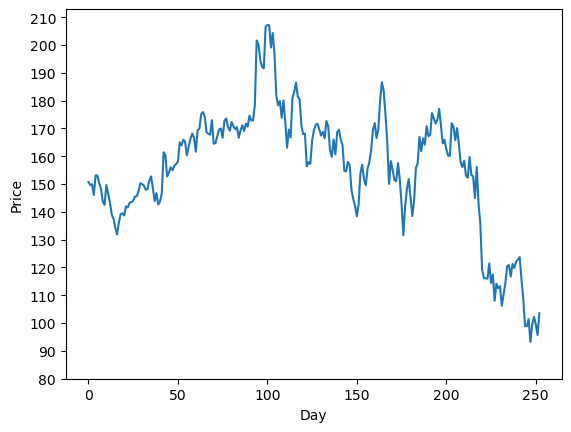

In [2]:
data=pd.read_csv("ABNB.csv",parse_dates=["Date"])
print(data)
data=pd.DataFrame(data["Close"].values.tolist())
x=np.log(data/data.shift(1))[1:]
data.plot(xlabel="Day",ylabel="Price",legend=False,yticks=range(80,220,10))
mu=x.mean()
dt=1/252
s=np.var(x)/dt
r=mu+s/2

In [3]:
print(r)
print(s**0.5)

0    0.164265
dtype: float64
0    0.575771
dtype: float64


In [4]:
data.tail(20)
S=data[0].iloc[-1]
print(S)
strike=100

103.510002


mu -0.0014913566847914934
s_square 0.001315525928287141
sigma_square 0.33151253392835955
sigma 0.5757712513910013
r 0.16426491027938828

In [5]:
option=TO(S,strike, r=r, T=151/252, N=5,sigma=s, mu=0, is_call=True, is_am=False)
print("Option price = "+str(option.price(True,True)))
option.print_deltas()
option.print_gammas()
option.d

          0           1           2           3           4           5
                                                             194.076597
                                                 171.149249  171.149249
                                     150.930436  150.930436  150.930436
                         133.100184  133.100184  133.100184  133.100184
             117.376319  117.376319  117.376319  117.376319  117.376319
 103.510002  103.510002  103.510002  103.510002  103.510002  103.510002
               91.28179    91.28179    91.28179    91.28179    91.28179
                          80.498164   80.498164   80.498164   80.498164
                                      70.988468   70.988468   70.988468
                                                  62.602206   62.602206
                                                              55.206659

         0          1          2          3          4          5
                                                        94.076597
   

0.881864438251219

In [6]:
dates=[6,11,16,21,26,41,61,86,126,151]
sigma=[0.6553,
     0.6196,
     0.638,
     0.6353,
    0.6414,
     0.6799,
   0.6610,
0.6489,
0.6389,
0.6368,]
n=2
tr_call=[TO(S,strike, r=r, T=i[0]/252, N=2*n,sigma=0.57, mu=0, is_call=True, is_am=True) for i in zip(dates,sigma)]
tr_option_call=[i.price(False,False) for i in tr_call]
b_call=[BO(S,strike, r=r, T=i[0]/252, N=2*n,sigma=0.57, mu=0, is_call=True, is_am=True) for i in zip(dates,sigma)]
b_option_call=[i.price(False,False) for i in b_call]
tr_option_call

[5.941765703050474,
 7.365382648849336,
 8.519519638983185,
 9.525363506863219,
 10.43358009122437,
 12.794102159794148,
 15.443819353251639,
 18.30415928680919,
 22.266424459679257,
 24.487350291954634]

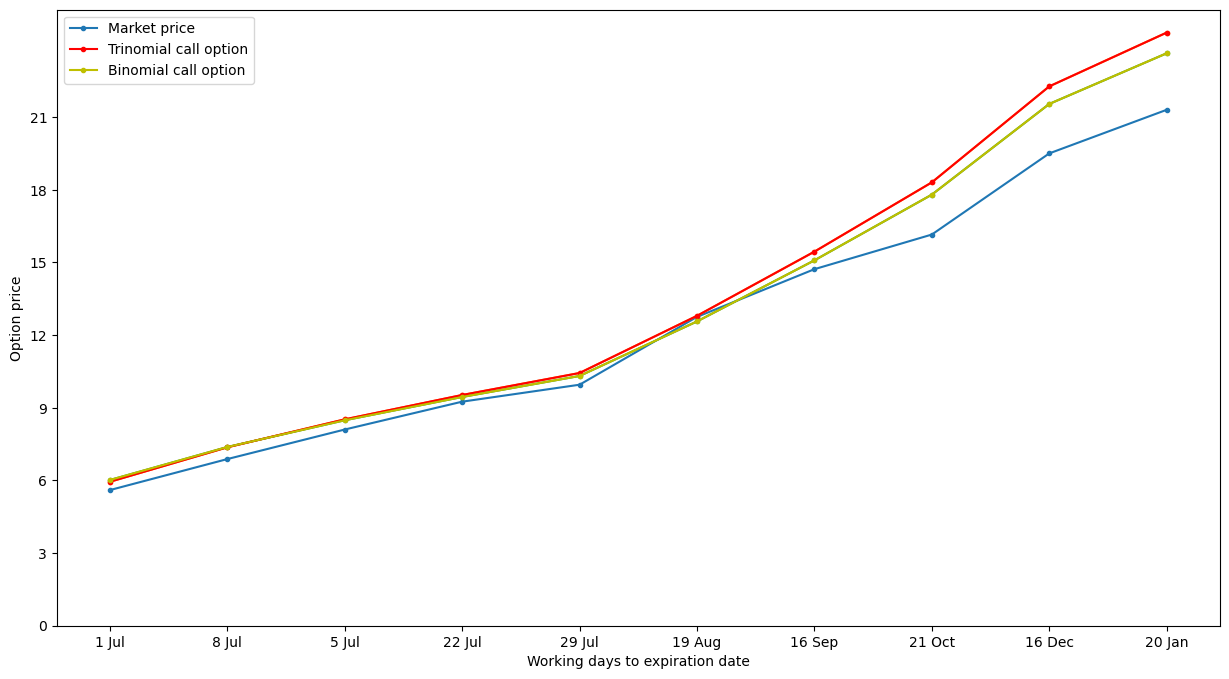

In [7]:
real_call=[5.6,6.88,8.1,9.25,9.95,12.75,14.72,16.15,19.5,21.3]
date_=['1 Jul','8 Jul','5 Jul','22 Jul','29 Jul','19 Aug','16 Sep','21 Oct','16 Dec','20 Jan']
plt.figure(figsize=(15,8))
plt.plot(date_, real_call,marker=".",label="Market price")
plt.plot(date_, tr_option_call,marker=".")
plt.plot(date_, b_option_call,marker=".")
plt.plot(date_, tr_option_call,marker=".",label='Trinomial call option',color='r')
plt.plot(date_, b_option_call,marker=".",label='Binomial call option',color='y')
plt.legend()
plt.xlabel("Working days to expiration date")
plt.ylabel("Option price")
plt.yticks(np.arange(0, max(real_call), 3))
plt.show()

In [8]:
call = pd.DataFrame([real_call,tr_option_call,b_option_call], index=['Real Data', 'Trinomial model','Binomial Model'])
call.columns=['1 Jul','8 Jul','5 Jul','22 Jul','29 Jul','19 Aug','16 Sep','21 Oct','16 Dec','20 Jan']
display(call)

1 Jul     8 Jul     5 Jul    22 Jul    29 Jul     19 Aug  \
Real Data        5.600000  6.880000  8.100000  9.250000   9.95000  12.750000   
Trinomial model  5.941766  7.365383  8.519520  9.525364  10.43358  12.794102   
Binomial Model   6.015999  7.378256  8.482137  9.443600  10.31116  12.562860   

                    16 Sep     21 Oct     16 Dec     20 Jan  
Real Data        14.720000  16.150000  19.500000  21.300000  
Trinomial model  15.443819  18.304159  22.266424  24.487350  
Binomial Model   15.084059  17.797303  21.541326  23.633142

In [9]:
call = pd.DataFrame([real_call,tr_option_call,b_option_call], index=['Real Data', 'Trinomial model','Binomial Model'])
call.columns=['1 Jul','8 Jul','5 Jul','22 Jul','29 Jul','19 Aug','16 Sep','21 Oct','16 Dec','20 Jan']
display(call)

1 Jul     8 Jul     5 Jul    22 Jul    29 Jul     19 Aug  \
Real Data        5.600000  6.880000  8.100000  9.250000   9.95000  12.750000   
Trinomial model  5.941766  7.365383  8.519520  9.525364  10.43358  12.794102   
Binomial Model   6.015999  7.378256  8.482137  9.443600  10.31116  12.562860   

                    16 Sep     21 Oct     16 Dec     20 Jan  
Real Data        14.720000  16.150000  19.500000  21.300000  
Trinomial model  15.443819  18.304159  22.266424  24.487350  
Binomial Model   15.084059  17.797303  21.541326  23.633142

In [10]:
pr=TO(S,strike, r=0.16, T=7/252, N=7,sigma=0.5758, mu=0, is_call=True, is_am=True)
pr.price(True, True)

          0           1           2           3           4           5           6           7
                                                                                     136.702369
                                                                         131.377137  131.377137
                                                             126.259349  126.259349  126.259349
                                                 121.340925  121.340925  121.340925  121.340925
                                     116.614097  116.614097  116.614097  116.614097  116.614097
                         112.071403  112.071403  112.071403  112.071403  112.071403  112.071403
             107.705669  107.705669  107.705669  107.705669  107.705669  107.705669  107.705669
 103.510002  103.510002  103.510002  103.510002  103.510002  103.510002  103.510002  103.510002
              99.477777   99.477777   99.477777   99.477777   99.477777   99.477777   99.477777
                          95.602627   95

6.195732336729044